#### Importing Libs

In [1]:
import os, sys
from dotenv import load_dotenv
import pandas as pd
import re
sys.path.insert(1, '..\classes')
from PlottingData import PlotData as pltd
from ProcessingData import ProcessData as proc

#### Enviroment Vars

In [2]:
load_dotenv()
RAW_DATA_PATH = os.getenv('RAW_DATA_PATH')
PROCESSED_DATA_PATH = os.getenv('PROCESSED_DATA_PATH')

#### Instance objects

In [3]:
plotter = pltd()
processor = proc()

#### Load data

In [6]:
df_tmp = pd.read_csv(RAW_DATA_PATH+'train_data.csv')
df_tmp.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


#### Process data

In [7]:
data_cleaned = processor.clean_whole_text(df_tmp, column_to_clean='text')

#### AED

* Primeiro olhamos para a contagem entre tweets rotulados como desastres e como não desastres.

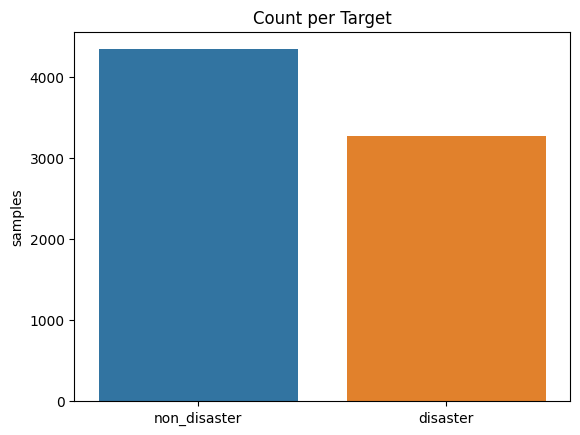

In [8]:
plotter.plot_target_balance(
    data=df_tmp, 
    column_target='target', 
    dict_map_classes={
        0:'non_disaster',
        1:'disaster'})

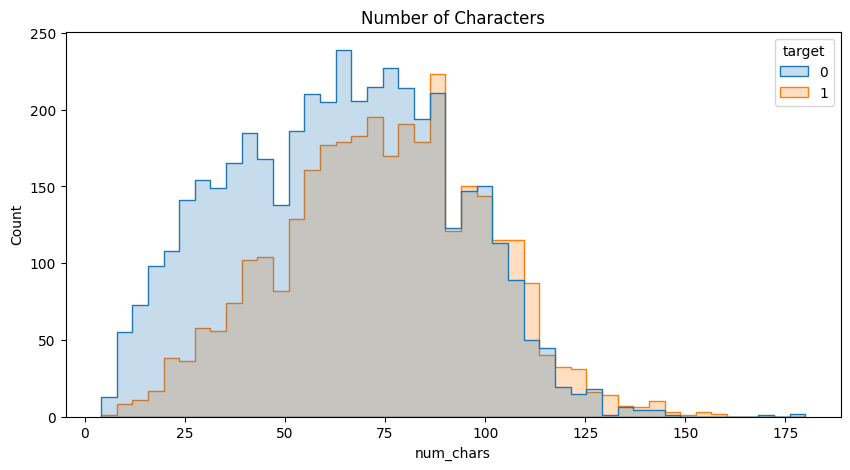

In [10]:
plotter.plot_num_char_per_text(data_cleaned, 'text')

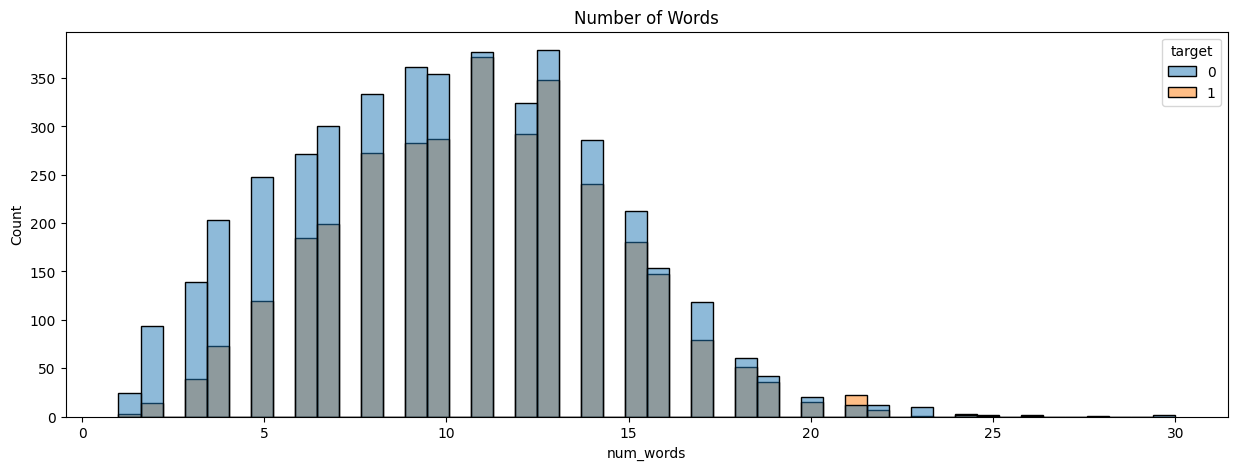

In [11]:
plotter.plot_number_of_words(data_cleaned, 'text')

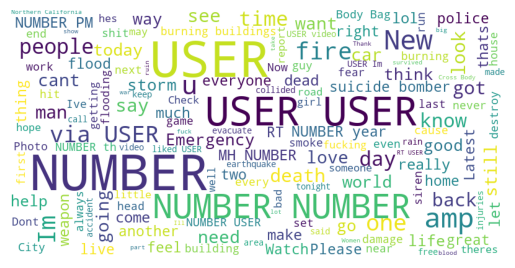

In [12]:
plotter.plot_wordcloud(data_cleaned, 'text', 'target')

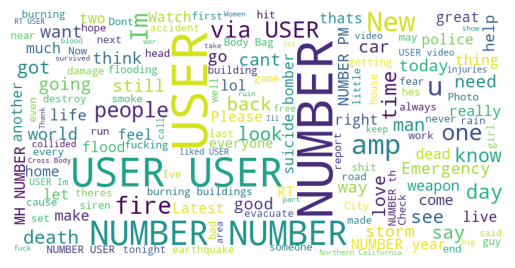

In [13]:
plotter.plot_wordcloud(data=data_cleaned, column_text='text', column_target='target', target=1)

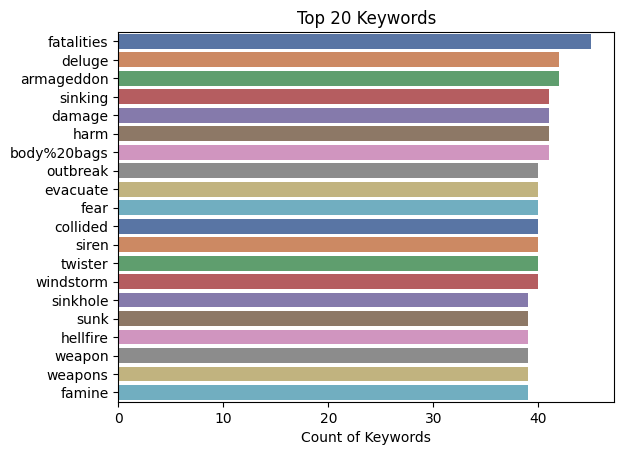

In [14]:
plotter.plot_count_sentences(data=data_cleaned, column_sentence='keyword')

In [11]:
#df_tmp.to_csv(PROCESSED_DATA_PATH+'train_data_cleaned.csv', index=False)